# By Gerard Ball

## Brief - An analysis of paleo-present climate data
- Analyse CO2 vs Temperature Anomaly from 800kyrs – present.
- Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)
- Examine Irish context:
- Climate change signals: (see Maynooth study: The emergence of a climate change
signal in long-term Irish meteorological observations - ScienceDirect)
- Fuse and analyse data from various data sources and format fused data set as a pandas
dataframe and export to csv and json formats.
- For all of the above variables, analyse the data, the trends and the relationships between
them (temporal leads/lags/frequency analysis).
- Predict global temperature anomaly over next few decades (synthesise data) and compare to
published climate models if atmospheric CO2 trends continue
- Comment on accelerated warming based on very latest features (e.g. temperature/polar-ice-
coverage
- Use a Jupyter notebook for your analysis and track your progress using GitHub.
Use an academic referencing style
***

# Table of Contents

1 . [Introduction](#introduction)

2 . [MoanaLoa](#moanaloa)

3 . [IceDepth](#icedepth)

4 . [Fusing](#fusing)

5 . [Json](#json)

6 . [IrishContext](#irishcontext)

7 . [Temporal Analysis](#temporal-analysis)

8 . [Projections](#projections)

9 . [Commentary](#commentary)

10 . [Conclusion](#conclusion)

11 . [Bibliography](#bibliography)

## Introduction

**Analyse CO2 vs Temperature Anomaly from 800kyrs – present.**

>To start, I needed to source global co2 measurements spanning some 800k years ago to present. The closest dataset matching these parameters I could find was the Luthi study, given to me by my professor Brian on the student page. This dataset was carried out by the well-known climate science researcher Dieter Luthi and his team and is called "High resolution carbon dioxide concentration record 650,000- 800,000 years before present". The dataset aimed to show a very detailed record of the co2 levels over a very large time span and was obtained from the EPICA DOME C 1999 (EDC99) ice core in Antarctica. A quick look at the code below will showcase a a sharp rise in co2 emissions for the most recent sample of appprox 10k years ago to present 1950. When later fused with the Manoa Loa dataset, this trend only continues, but this time, in a significantly smaller time period, stressing the need for global climate action. 

>Below I load the dataset into python. Previously i exported it from the numbers app on my mac, then converted to csv and then the below once I had it in my repository. 

>Here is where you can download said dataset: https://www.nature.com/articles/nature06949


In [83]:
import pandas as pd

 
pd.set_option('display.max_rows', None)
csv_file_path = "Co2.csv"

df = pd.read_csv(csv_file_path)

# No NaN values
df = df.dropna(axis=1, how='all')


print(df)


         YearBP  CO2 (ppmv)  sigma mean CO2 (ppmv)
0        -51.03      368.02                   0.06
1        -48.00      361.78                   0.37
2        -46.28      359.65                   0.10
3        -44.41      357.11                   0.16
4        -43.08      353.95                   0.04
5        -42.31      353.72                   0.22
6        -41.13      352.42                   0.10
7        -39.97      350.81                   0.16
8        -39.41      349.80                   0.14
9        -38.97      349.28                   0.13
10       -38.07      347.60                   0.40
11       -37.21      345.44                   0.03
12       -36.62      344.72                   0.09
13       -36.14      343.97                   0.06
14       -35.76      343.11                   0.14
15       -34.92      342.05                   0.46
16       -33.08      341.33                   0.10
17       -33.03      339.46                   0.30
18       -29.14      334.85    

***

> Next. I needed the temperature data spanning roughly the same time span as the above co2 dataset by Luthi. Again, this was provided to me via my university's portal page by way of a direct download link to the Jouzel temperature data, which, like the above luthi co2 data, originats from the EPICA Dome C ice core but this one focuses on temperature ranges and ice depth measurements from 800k years ago to near present. Jean Jouzel is a glacialologist and climatologist who is very well known in the climate field. Again, just from having a cursory look at the data below, you can see the gradual increase in the temperature recently, which will only become more apparent when I synthesise the dataset to account for the missing period of 1950-2023 aka present. 

> You can download the dataset here: https://doi.pangaea.de/10.1594/PANGAEA.683655


In [84]:
import pandas as pd

# files
temperature_csv_path = "temp.csv"

temperature_df = pd.read_csv(temperature_csv_path)

# No NaN values for cleanliness
temperature_df = temperature_df.dropna(axis=1, how='all')

# all row
pd.set_option('display.max_rows', None)

print(temperature_df)

      Depth ice/snow [m]  Age model [ka]  %[SNOW]  [DegreesC]  Sample ID
0                   0.00          -0.050      NaN         NaN          1
1                   0.55          -0.044      NaN         NaN          2
2                   1.10          -0.037      NaN         NaN          3
3                   1.65          -0.032      NaN         NaN          4
4                   2.20          -0.025      NaN         NaN          5
5                   2.75          -0.018      NaN         NaN          6
6                   3.30          -0.011      NaN         NaN          7
7                   3.85          -0.003      NaN         NaN          8
8                   4.40           0.005      NaN         NaN          9
9                   4.95           0.014      NaN         NaN         10
10                  5.50           0.022      NaN         NaN         11
11                  6.05           0.031      NaN         NaN         12
12                  6.60           0.038   -390.9  

***

Next order of business was to analyse the co2 v temp data above by time series plotting them to get visual cues as to their alignment or not. As you can see from the results, the graphs show significant overlap which makes sense as, historically:

>"Historical data as well as future climate models show that global warming is (approximately) directly proportional to the increase of CO2 concentrations in the atmosphere. More specifically: every time the CO2 concentrations rise by 10 ppm (parts per million), the mean global temperature increases by 0.1 °C." - https://factsonclimate.org/infographics/concentration-warming-relationship. This can be seen with the below plots. 

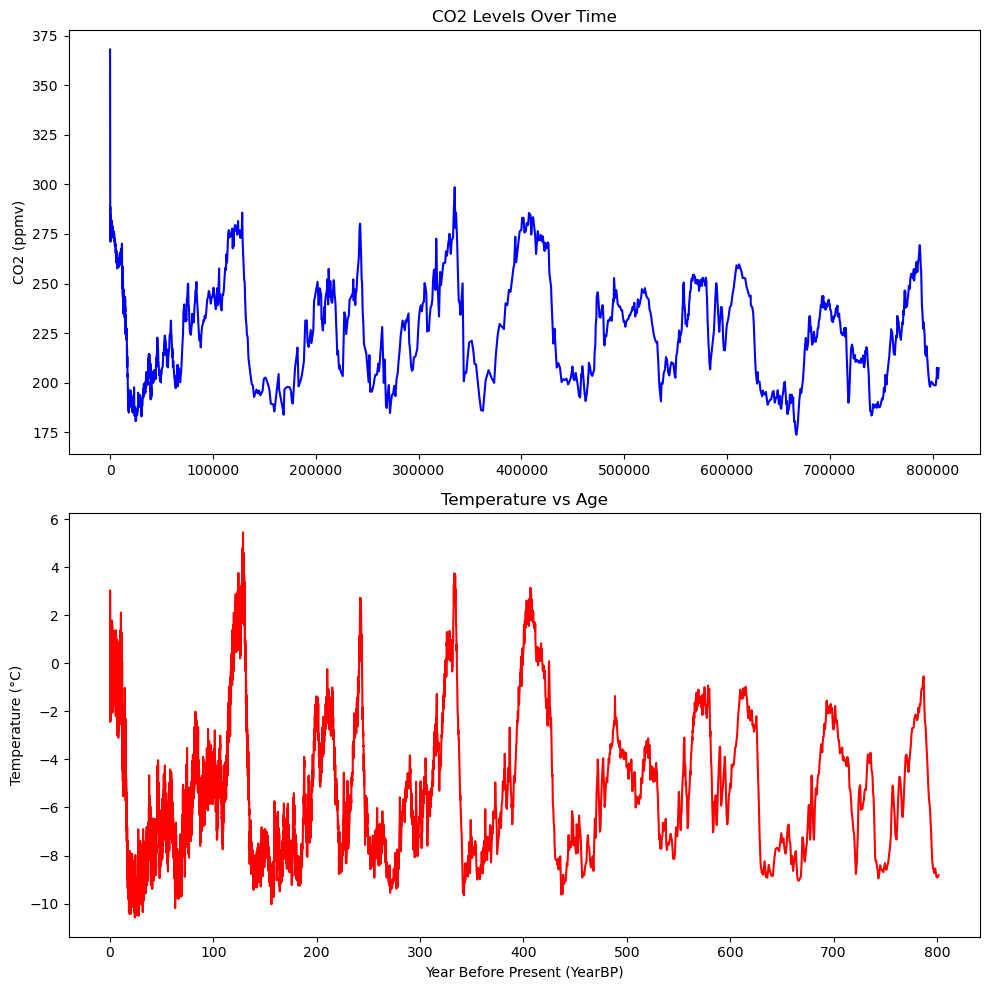

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Load
file_path_co2 = 'co2.CSV'  
file_path_temp = 'temp.csv'
df_co2 = pd.read_csv(file_path_co2)
df_temp = pd.read_csv(file_path_temp)

# CO2 
year_column_co2 = 'YearBP'
co2_column_co2 = 'CO2 (ppmv)'

# Temperature
age_column_temp = 'Age model [ka]'
temperature_column_temp = '[DegreesC]'  

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot CO2
ax1.plot(df_co2[year_column_co2], df_co2[co2_column_co2], linestyle='-', color='b')
ax1.set_ylabel('CO2 (ppmv)')
ax1.set_title('CO2 Levels Over Time')

# Plot Temperature
ax2.plot(df_temp[age_column_temp], df_temp[temperature_column_temp], linestyle='-', color='r')
ax2.set_xlabel('Year Before Present (YearBP)')
ax2.set_ylabel('Temperature (°C)')
ax2.set_title('Temperature vs Age')

plt.tight_layout()

# Show the plot
plt.show()

Source for below image - https://www.nature.com/articles/nature06949
Aligns perfectly with my own data results of co2 and temp over 800k yeras to present. 

![Alt text](image.png)

***

> Next step was carrying out some summary stats on the co2 and temp data. I carried out max, min, mean calculations and a correlation coefficient between co2 v temp to classify how closely they aligned. The results were as follows; 

**For Temperature;**
-  Highest Temperature: 5.46°C at Age 128.662 ka
- Lowest Temperature: -10.58°C at Age 24.015 ka
- Mean Temperature: -4.577593296475467°C

**For  CO2;**
- Highest CO2 Concentration: 368.02 ppmv at YearBP -51.03
- Lowest CO2 Concentration: 173.71 ppmv at YearBP 667409.86
- Mean CO2 Concentration: 235.56669121514994 ppmv

**Correlation Coefficient of Temperature vs CO2 relationship:**
- Correlation Coefficient: 0.84540633240228

**Thoughts of the results**
- The mean overall co2 of 235 was striking given at the end of the Manoa Loa results which will be plotted next, the co2 levels reach greater than 420. 

- The coefficient was carried out as I wanted to carry out a statistical test that proved what my eyes were telling me; that co2 and temperature are positively linked. A correlation coefficient is a statistical measure that shows you the linear relationship that exists between two variables. The score ranges from 1 - -1. A coefficient score of 1 represents a perfect positive correlation whereas -1 represents the same, but negative. The results showed a coefficient of 0.84540633240228 which indicates a high positive linear relationship, as the plot itelf shows, alongside the coefficient score. 

> Below are the code cells used to calculate the above results:


In [86]:
import pandas as pd

file_path = 'temp.csv'
df = pd.read_csv(file_path)

# highest delta
max_temp_row = df[df['[DegreesC]'] == df['[DegreesC]'].max()]

# Find the lowest
min_temp_row = df[df['[DegreesC]'] == df['[DegreesC]'].min()]

# mean 
mean_temp_value = df['[DegreesC]'].mean()

# Extract information
max_temp_age = max_temp_row['Age model [ka]'].values[0]
min_temp_age = min_temp_row['Age model [ka]'].values[0]
max_temp_value = max_temp_row['[DegreesC]'].values[0]
min_temp_value = min_temp_row['[DegreesC]'].values[0]

# Print results
print(f'Highest Temperature: {max_temp_value}°C at Age {max_temp_age} ka')
print(f'Lowest Temperature: {min_temp_value}°C at Age {min_temp_age} ka')
print(f'Mean Temperature: {mean_temp_value}°C')

Highest Temperature: 5.46°C at Age 128.662 ka
Lowest Temperature: -10.58°C at Age 24.015 ka
Mean Temperature: -4.577593296475467°C


In [87]:
import pandas as pd

file_path = 'co2.csv'
df = pd.read_csv(file_path)

max_co2_row = df[df['CO2 (ppmv)'] == df['CO2 (ppmv)'].max()]
min_co2_row = df[df['CO2 (ppmv)'] == df['CO2 (ppmv)'].min()]
mean_co2_value = df['CO2 (ppmv)'].mean()

max_co2_year = max_co2_row['YearBP'].values[0]
min_co2_year = min_co2_row['YearBP'].values[0]
max_co2_value = max_co2_row['CO2 (ppmv)'].values[0]
min_co2_value = min_co2_row['CO2 (ppmv)'].values[0]

print(f'Highest CO2 Concentration: {max_co2_value} ppmv at YearBP {max_co2_year}')
print(f'Lowest CO2 Concentration: {min_co2_value} ppmv at YearBP {min_co2_year}')
print(f'Mean CO2 Concentration: {mean_co2_value} ppmv')


Highest CO2 Concentration: 368.02 ppmv at YearBP -51.03
Lowest CO2 Concentration: 173.71 ppmv at YearBP 667409.86
Mean CO2 Concentration: 235.56669121514994 ppmv


In [88]:
import pandas as pd
from scipy.stats import pearsonr

file_path_temp = 'temp.csv'
file_path_co2 = 'co2.csv'
df_temp = pd.read_csv(file_path_temp)
df_co2 = pd.read_csv(file_path_co2)

temperature_column_temp = '[DegreesC]' 
co2_column_co2 = 'CO2 (ppmv)'

# Merged
df_merged = pd.merge(df_temp, df_co2, left_on='Age model [ka]', right_on='YearBP', how='inner')

# Drop missing rows
df_temp_co2 = df_merged[[temperature_column_temp, co2_column_co2]].dropna()

# correlation coefficient
corr_coefficient, _ = pearsonr(df_temp_co2[temperature_column_temp], df_temp_co2[co2_column_co2])

print(f'Correlation Coefficient: {corr_coefficient}')

Correlation Coefficient: 0.84540633240228


***

## MoanaLoa

>Next  step was to find a dataset that would help fill in the missing pieces from the others aka from 1950 - 2023 or present day.

 For co2, I opted for the widely available Manoa Loa co2 dataset which spans from 1958 to 2023, exactly what was needed. The dataset itself consists of measurements of atmospheric co2 emissions which were taken on site in Hawaii, in the Mauna Loa Observatory, thus the datasets name. 
 
 Below, I will start by simply plotting this dataset to get an idea of its trends etc. From below, it can be clearly seen that co2 is rising consistently through the datsets years. 

- The growth rate seems to be increasing year by year
- Emissions were approximately 300 ppm in the 1950 to the current 430, a staggering 40 percent increse in just 60 or so years. 

For context, according to my above co2 data set spanning 800k years, co2 emissions across those ancient times regularly peaked in the 250-300 range, but, crucially, this was then proceeded by a fall to approximately 150-200, which is typical of Earth's orbital cycles -  https://climate.nasa.gov/explore/ask-nasa-climate/2949/why-milankovitch-orbital-cycles-cant-explain-earths-current-warming/. However, according to NASA and the scientific community, Earth's current orbital position lends itself to a cooling off period right now yet we are seeing quite the opposite - https://climate.nasa.gov/explore/ask-nasa-climate/2949/why-milankovitch-orbital-cycles-cant-explain-earths-current-warming/. From the 1850 Industrial revolution onwards with a particular emphasis on 1950 onwards, Earth's co2 and temps are skyrocketing (relatively) as showcased by the datasets so far and to come. 

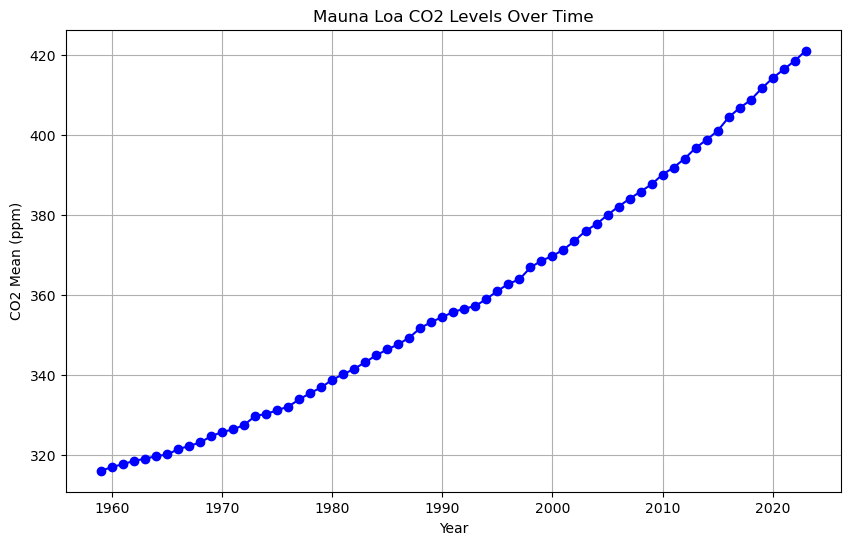

In [89]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('manoaloa.csv')

# Plot it
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['mean'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('CO2 Mean (ppm)')
plt.title('Mauna Loa CO2 Levels Over Time')
plt.grid(True)
plt.show()

***

## IceDepth

**Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)**

> Next I needed to analyse one additional paleo dataset, ideally of around the same time span. For this; I elected for simplicity and opted to examine the ice/snow depth in the already loaded co2 file I had. Handy. The results were pretty simple and didn't offer too much opportunity for plots; 

**As shown below; there has been an accumulation of more than 3000 metres of snow/ice in the time period of 800,000 years.**

- Below code also *attempts* to synthesise this dataset so that it is current. Didn't look great in the plot, but i'm unsure if I even needed to attempt it for this one. 

- The code below analyses the relationship between the ice depth and the age and then attempts a polynomial regression based off the 800k dataset and synthesises the 1950-modern timetable. Plot looks terrible regarding that synthesis, but I an unsure if it could really look any different considering 0 was the depth in 1950 so synthesising it made my head explode. 

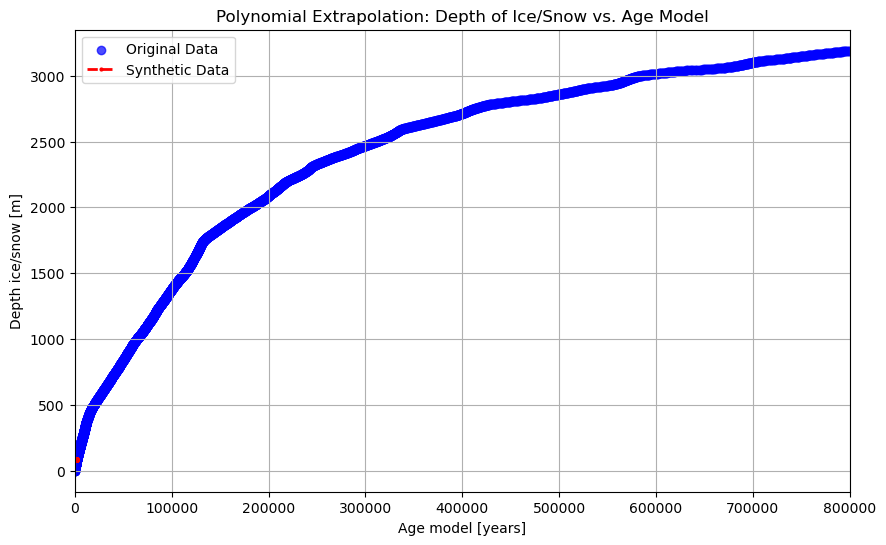

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the original CSV file
df = pd.read_csv('icedepth.csv')

# only columns needed 
depth_column = 'Depth ice/snow [m]'
age_column = 'Age model [ka]'


df[age_column] = df[age_column] * 1000  # Convert from ka to years


pre_1950_data = df[df[age_column] < 1950]

# polynomial regression
degree = 2  # You can adjust the degree of the polynomial
coefficients = np.polyfit(pre_1950_data[age_column], pre_1950_data[depth_column], degree)
poly_func = np.poly1d(coefficients)

# syn (1950-2023)
desired_years = np.arange(1950, 2024, 0.001)  # Adjust the step size as needed
synthetic_depths = poly_func(desired_years)

# Plot og and syn data
plt.figure(figsize=(10, 6))
plt.scatter(df[age_column], df[depth_column], marker='o', color='blue', alpha=0.7, label='Original Data')
plt.plot(desired_years, synthetic_depths, linestyle='--', color='red', linewidth=2, marker='o', markersize=2, label='Synthetic Data')
plt.xlabel('Age model [years]')
plt.ylabel('Depth ice/snow [m]')
plt.title('Polynomial Extrapolation: Depth of Ice/Snow vs. Age Model')

# 800k in yrs
plt.xlim([0, 800000])
plt.legend()
plt.grid(True)
plt.show()

# Save to json for brief JSON file
df.to_json('icedepth.json')


***

## Fusing

**Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats.**

**Next is the dataset fusing stage of historic and modern datasets**
- I started with Co2 and fused togtether my Luthi 800k dataset with the Manoa Loa to get a full 800k to present dataset on the co2 span over that time. I did find this tricky but went about it as follows; 

- I started by gutting the unneeded columns from the two datasets and only kept what was necessary; the mean and year. Then i ensured my two unfused datasets had the same column names, to achieve this, I renamed them YearBP and Mean so the code could fuse them and the vital data as one. Now, this brought about challenges given one scale is in 800,000 years and other a mere 70. I did not know how to solve this but the plot is still effective as the Manoa loa data is highly distinct as its emissions are so high so even though it represents a tiny relative period, its distinct enough to actively plot as part of a fused 1 complete dataset. 

- Also, i reversed the order by indicating ascending=false as I wanted the fused data to correctly align with 2023-800k years ago. 

**Sources essential for the above:**
- [combining-dataframes-Stackoverflow](https://stackoverflow.com/questions/12850345/how-do-i-combine-two-dataframes)

- [merging: How to](https://realpython.com/pandas-merge-join-and-concat/)

- Stackoverflow was very helpful for some of the code blocks

- I had merged before in a different module, but I had extreme error troubles for the project all thanks to invisible line spacing column errors, special characters, file naming conventions etc. I also, as stated already, found it too hard to solve the time span differences between the two datasets when it came to plotting. All that being said, I still managed to merge them together successfully and plotted the results as seen below. 

In [91]:
import pandas as pd

# datasets with only 'YearBP' and 'Mean'
df1_selected = pd.read_csv('fusedco2.csv')
df2_selected = pd.read_csv('manoaloafused_selected.csv')

# reverse order for greater 'legibility'
df2_selected = df2_selected.sort_values(by='YearBP', ascending=False)

# fuse
merged_selected_df = pd.concat([df2_selected, df1_selected])


merged_selected_df.to_csv('fusedc02.csv', index=False)


pd.set_option('display.max_rows', None)
print(merged_selected_df)

         YearBP    Mean
64      2023.00  421.08
63      2022.00  418.53
62      2021.00  416.41
61      2020.00  414.21
60      2019.00  411.65
59      2018.00  408.72
58      2017.00  406.76
57      2016.00  404.41
56      2015.00  401.01
55      2014.00  398.81
54      2013.00  396.74
53      2012.00  394.06
52      2011.00  391.85
51      2010.00  390.10
50      2009.00  387.64
49      2008.00  385.83
48      2007.00  384.02
47      2006.00  382.09
46      2005.00  379.98
45      2004.00  377.70
44      2003.00  375.98
43      2002.00  373.45
42      2001.00  371.32
41      2000.00  369.71
40      1999.00  368.54
39      1998.00  366.84
38      1997.00  363.88
37      1996.00  362.74
36      1995.00  360.97
35      1994.00  358.96
34      1993.00  357.21
33      1992.00  356.54
32      1991.00  355.70
31      1990.00  354.45
30      1989.00  353.20
29      1988.00  351.69
28      1987.00  349.31
27      1986.00  347.61
26      1985.00  346.35
25      1984.00  344.87
24      1983.00 

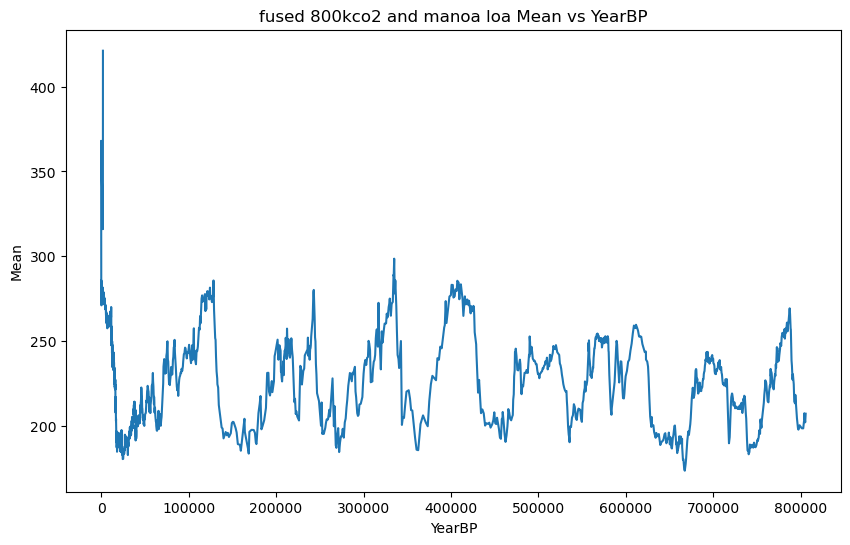

In [92]:
plt.figure(figsize=(10,6))
plt.plot(merged_selected_df['YearBP'], merged_selected_df['Mean'])
plt.xlabel('YearBP')
plt.ylabel('Mean')
plt.title('fused 800kco2 and manoa loa Mean vs YearBP')
plt.show()

>As you can see from the above merged plot, the Manoa Loa data - despite being so tiny in a scale of 800k years, is very distinct as it stands alone with co2 ppm rising over 400. The dataset is complete abd modern with the merger. 

***

>Next thing to do was to find a modern temperature dataset so that I could merge it with my 800k temperature dataset, just as i did in relation to c02. 

- However, I faced many challenges here. First was I couldn't find a suitable mostly like for like antarctica dataset which I needed to make the data match. Couldn't use just global average temp means as, of course, they're far higher than that of antarctica. So, with the absense of a better alternative, I synthesised the missing temp data based wholly off my original temperature dataset. To do this, assumptions were needed. According to the Centre For Science Education, Antaractica is warming at a rate of between 0.22-0.32 Celcius decade - [Centre for Science Education](https://scied.ucar.edu/learning-zone/climate-change-impacts/warming-antarctica).

- The last Celcious readings from my 800k temp data seemed to rest around 0 celcius so I used that as a starting point and simply applied the above projections into the code; 

````
warming_rate_low = 0.022 
warming_rate_high = 0.032
````
The below randomness was also incorporated as without it, my prediction resembled a perfect disgonal line, which didn't look very 'authentic'. -.2 and .2 randomness were chosen so as to not randomise it too much. 
````
synthetic_temperatures = base_synthetic_temperatures + np.random.uniform(-0.2 * base_synthetic_temperatures, 0.2 * base_synthetic_temperatures)
````
- The plot of the synthesised data looks effective as it accurately highlights what Antarctica's current warming rate looks like. The fused dataset plot less so as the synthesised data is simply eaten by the size and scale of the original data. The synthesised data is too small on the scale as to be discernible. 
>Sources needed for this

- [Stackoverflow](https://stackoverflow.com/questions/75431355/generating-synthetic-data-using-scikit-learn-for-ml)

- [How to synthesise](https://betterdatascience.com/python-synthetic-datasets/)

- So, the above projections are accurate to general Antarctica projections. However, obviously starting from a rigid 0 celcius offers limitatons. Best I was capable of. Below is the code used for the synthesis and plot. 


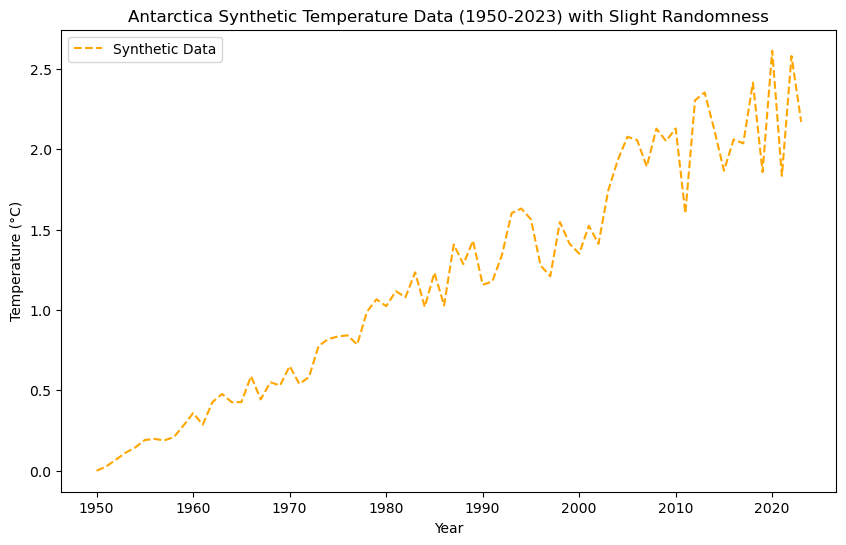

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the warming rate
warming_rate_low = 0.022  # Adjusted for a constant warming rate per year
warming_rate_high = 0.032

# Other datasets cease at 1950 so needed something else to get to 'present'
years_1950_to_2023 = 2023 - 1950


base_synthetic_temperatures = np.linspace(0, years_1950_to_2023 * warming_rate_high, years_1950_to_2023 + 1)
synthetic_temperatures = base_synthetic_temperatures + np.random.uniform(-0.2 * base_synthetic_temperatures, 0.2 * base_synthetic_temperatures)

synthetic_index = np.arange(1950, 2024)


synthetic_df = pd.DataFrame({'Synthetic_Temperature': synthetic_temperatures}, index=synthetic_index)

# Plot the synthetic data with a bit of randomness
plt.figure(figsize=(10, 6))
plt.plot(synthetic_index, synthetic_df['Synthetic_Temperature'], label='Synthetic Data', linestyle='--', color='orange')
plt.title('Antarctica Synthetic Temperature Data (1950-2023) with Slight Randomness')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [94]:
import pandas as pd

file_path_original = 'newtemp.csv'
original_df = pd.read_csv(file_path_original)


file_path_synthetic = 'synthtemp.csv'
synthetic_df = pd.read_csv(file_path_synthetic)

synthetic_df = synthetic_df.sort_values(by='Year', ascending=False)


fused_df = pd.concat([synthetic_df, original_df])


fused_df.to_csv('new_fused_temperature_data.csv', index=False)

# fused DataFr
print(fused_df)

          Year   DegreesC
73    2023.000   2.635421
72    2022.000   1.944159
71    2021.000   2.714223
70    2020.000   2.140730
69    2019.000   2.384639
68    2018.000   1.952849
67    2017.000   1.938830
66    2016.000   2.077487
65    2015.000   2.403719
64    2014.000   1.804939
63    2013.000   2.021467
62    2012.000   1.600228
61    2011.000   1.753722
60    2010.000   2.142145
59    2009.000   1.952557
58    2008.000   1.775468
57    2007.000   1.941574
56    2006.000   1.446330
55    2005.000   1.924036
54    2004.000   1.433184
53    2003.000   1.991227
52    2002.000   1.568797
51    2001.000   1.618154
50    2000.000   1.741266
49    1999.000   1.521170
48    1998.000   1.693500
47    1997.000   1.225623
46    1996.000   1.242008
45    1995.000   1.376432
44    1994.000   1.222330
43    1993.000   1.643647
42    1992.000   1.246673
41    1991.000   1.119138
40    1990.000   1.521993
39    1989.000   1.411380
38    1988.000   1.275379
37    1987.000   1.357247
36    1986.0

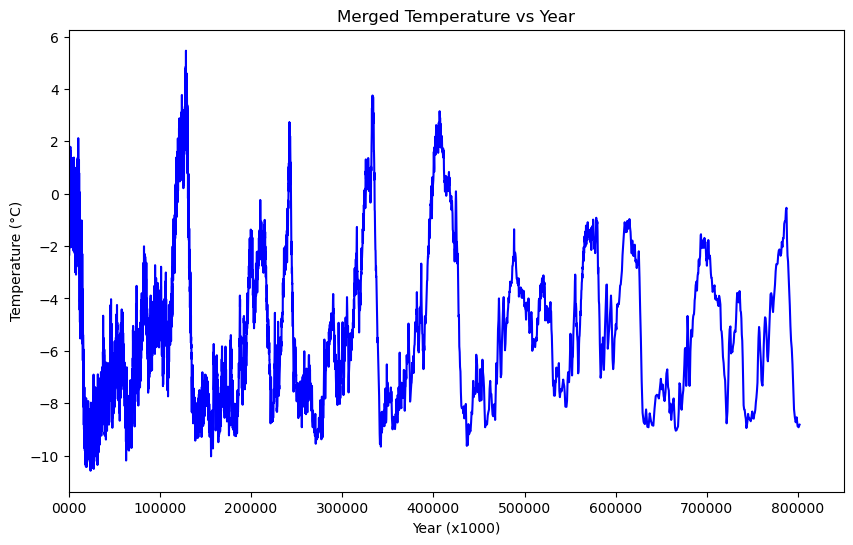

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('new_fused_temperature_data.csv')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df[' DegreesC'], label='Temperature', color='blue')
plt.xlabel('Year (x1000)')
plt.ylabel('Temperature (°C)')
plt.title('Merged Temperature vs Year')

# limits
plt.xlim(0, 850)

# x axis in thousands of years aka x1000
plt.xticks([x for x in range(0, 851, 100)], labels=[f'{x}000' for x in range(0, 851, 100)])

plt.show()

In [96]:
import pandas as pd

# Load the original CSV file
df = pd.read_csv('icedepth.csv')


selected_columns = ['Depth ice/snow [m]', 'Age model [ka]']
df_selected = df[selected_columns]


df_selected.to_csv('ice_depth_selected.csv', index=False)


***

## Json

**CSV AND JSONS OF THE FUSED DATASETS**

> Here is the code used to make jSON files out of the already made CSVs.

In [97]:
import pandas as pd

# Csv
df = pd.read_csv('fusedco2.csv')

# Convert 2 JSON 
df.to_json('fusedco2.json', orient='records', lines=True)

In [98]:
import pandas as pd

# csv
df = pd.read_csv('TTEMP.csv')

# Convert it  jsonSON 
df.to_json('TTEMP.json', orient='records', lines=True)


In [99]:
#Save the DataFrame to a JSON file
df.to_json('icedepth.json')


***

## IrishContext

**Examine Irish context: Climate change signals: (see Maynooth study: The emergence of a climate change signal in long-term Irish meteorological observations - ScienceDirect)**

> From an Irish POV - I wanted to make it as simple as possible as I found manipulating these datasets to be extremely difficult and error shrewn. Firstly, I researched the Maynooth study as mentioned in the brief. The study, "The Emergence of a Climate Signal in Long Term Meteorological Observations" was a study conducted this year - 2023 - well, last year now - that examined weather measurements across many weather stations in Ireland over a period of 150 years. To summarise, their findings that are relevant to this project were; 

-  Ireland, like everywhere else, is currently experiencing global warming. 
- What I found most informative was this line: 'Warming at the island scale is estimated at 0.88°C per degree warming in Global Mean Surface Temperature (GMST'. This is telling us that for every degree of temperature increase globally, Ireland will increase by .88C. 
- Essentially, Ireland is unfortunately not isolated from global warming, althought it is at a slightly lesser extent than the global average. 

>Taking these findings into account; I found an Irish dataset spanning from 1990-2022 that covers Irish temperature means over that period. The dataset can be found here; https://www.met.ie/climate/what-we-measure/temperature#top

I carried out the below analysis of the met database:

- Plot the dataset to see its trends
- Print the yearly temp averages one after another to see the exact trend increase more slowly. 
- Carry out a Trend line and Moving average line plot to once again visualise what has been visualised all throughout this project whether it be a global or Irish perspective; mean yearly temperatures are on the rise and have been, are currently - and will continue to - rise drammatically. 

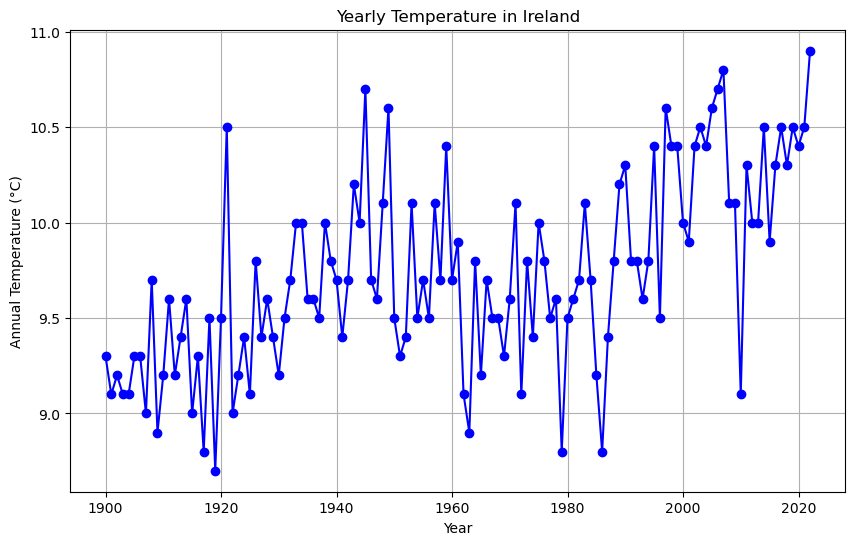

In [100]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'irishtemps.csv'  
df = pd.read_csv(file_path)

year_column = 'year'
temperature_column = 'Annual'


plt.figure(figsize=(10, 6))
plt.plot(df[year_column], df[temperature_column], marker='o', linestyle='-', color='b')


plt.xlabel('Year')
plt.ylabel('Annual Temperature (°C)')
plt.title('Yearly Temperature in Ireland')

# Show the plot
plt.grid(True)
plt.show()

In [101]:
import pandas as pd

file_path = 'irishtemps.csv'
df = pd.read_csv(file_path)

year_column = 'year'
temperature_column = 'Annual'

mean_temperature_by_year = df.groupby(year_column)[temperature_column].mean().reset_index()

print("Year\tMean Temperature (°C)")
for index, row in mean_temperature_by_year.iterrows():
    print(f"{int(row[year_column])}\t{row[temperature_column]:.2f}")


Year	Mean Temperature (°C)
1900	9.30
1901	9.10
1902	9.20
1903	9.10
1904	9.10
1905	9.30
1906	9.30
1907	9.00
1908	9.70
1909	8.90
1910	9.20
1911	9.60
1912	9.20
1913	9.40
1914	9.60
1915	9.00
1916	9.30
1917	8.80
1918	9.50
1919	8.70
1920	9.50
1921	10.50
1922	9.00
1923	9.20
1924	9.40
1925	9.10
1926	9.80
1927	9.40
1928	9.60
1929	9.40
1930	9.20
1931	9.50
1932	9.70
1933	10.00
1934	10.00
1935	9.60
1936	9.60
1937	9.50
1938	10.00
1939	9.80
1940	9.70
1941	9.40
1942	9.70
1943	10.20
1944	10.00
1945	10.70
1946	9.70
1947	9.60
1948	10.10
1949	10.60
1950	9.50
1951	9.30
1952	9.40
1953	10.10
1954	9.50
1955	9.70
1956	9.50
1957	10.10
1958	9.70
1959	10.40
1960	9.70
1961	9.90
1962	9.10
1963	8.90
1964	9.80
1965	9.20
1966	9.70
1967	9.50
1968	9.50
1969	9.30
1970	9.60
1971	10.10
1972	9.10
1973	9.80
1974	9.40
1975	10.00
1976	9.80
1977	9.50
1978	9.60
1979	8.80
1980	9.50
1981	9.60
1982	9.70
1983	10.10
1984	9.70
1985	9.20
1986	8.80
1987	9.40
1988	9.80
1989	10.20
1990	10.30
1991	9.80
1992	9.80
1993	9.60
1994	9.80
1995	1

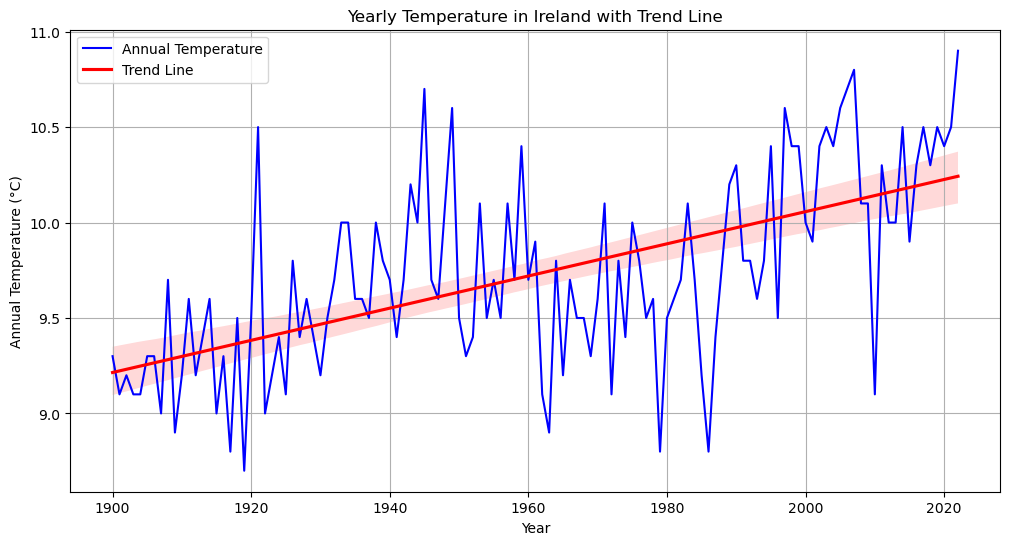

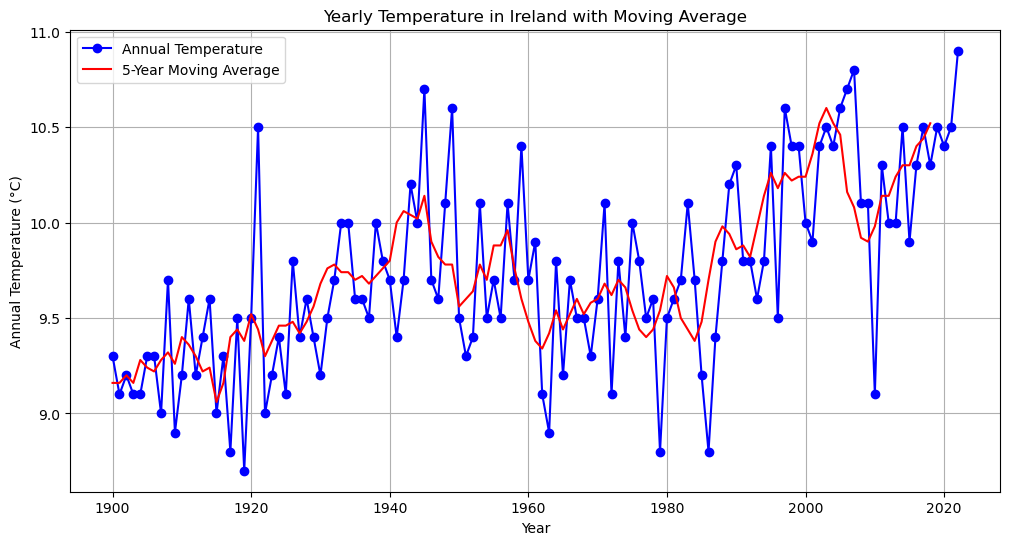

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'irishtemps.csv'  
df = pd.read_csv(file_path)

# 
df.columns = df.columns.str.strip()

# col names
year_column = 'year'
temperature_column = 'Annual'

# tim series and trend line
plt.figure(figsize=(12, 6))
sns.lineplot(x=df[year_column], y=df[temperature_column], label='Annual Temperature', color='b')
sns.regplot(x=df[year_column], y=df[temperature_column], scatter=False, label='Trend Line', color='r')
plt.xlabel('Year')
plt.ylabel('Annual Temperature (°C)')
plt.title('Yearly Temperature in Ireland with Trend Line')
plt.legend()
plt.grid(True)
plt.show()

# moving average
window_size = 5 
df['Moving_Average'] = df[temperature_column].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(df[year_column], df[temperature_column], marker='o', linestyle='-', color='b', label='Annual Temperature')
plt.plot(df[year_column], df['Moving_Average'], color='r', label=f'{window_size}-Year Moving Average')
plt.xlabel('Year')
plt.ylabel('Annual Temperature (°C)')
plt.title('Yearly Temperature in Ireland with Moving Average')
plt.legend()
plt.grid(True)
plt.show()


plt.show()


***

## Temporal Analysis

> Below contains a half working auto correction plot for co2 vs temp and Time delay lags for co2, temperature, manoa loa and the Irish datset. For both instances of the large temperature dataset - in both auto correction and time lag analysis, my plot looks wrong. I am not clever enough to figure it out but I suspect its the age scale causing havoc once more. 

**Autocorrection of fused C02 and Temperature results**:

An autocorrection plot is a 'way of measuring the similiarity or difference between a time series and its lagged versions' - https://scicoding.com/4-ways-of-calculating-autocorrelation-in-python/. For this section of the brief, temporal analysis of the data was required so i opted for autocorrection and time series lags to represent the data. 

>For the co2;

 You can see there is significant deviation from the expected autocorrection value, in particular in the last 10 percent of shown values aka the most recent values. This jives well with reality as we know - from above sections - that co2 rises quite significantly in the last 100 or so years. I'm unsure why the x-axis only accounts for <2000 years in this particular plot considering the dataset contains values from 800k years. 

 > For the temperature;
 
One of two things is happening; either my auto correction analysis isn't working which is why I see no discernible deviations at all or my temperature data exhibits no discernible deviations. Probably the former. 

> For c02 with Time Delay plot;

It's obviously the same type of information, just visualised differently with a time delay rather than an autocorrection one like before. This plot directly shows the comparison between the lagged and original at every turn, whereas the auto correction plot was more detailed. The x - axis here is appropriate at 800k which explains the smaller visible deviations, due to the scale differences.


> For Temperature Time Delay plot;

Again, my temperature data is clearly incorrectly plotted. I'm unsure of the cause. 

> For Manoa Loa co2;

The original and lagged values do closely follow with no dramatic deviation. 

> For the Irish dataset;

Same as above, no obvious large deviation is to be seen, it closely aligns with the data. 

> Sources needed


- [Stackoverflow lag analysis - temporal](https://stackoverflow.com/questions/58277927/how-to-incorporate-and-forecast-lagged-time-series-variables-in-a-python-regress)

- [Scicoding - autocorrection lag](https://scicoding.com/4-ways-of-calculating-autocorrelation-in-python/)

- [Timeshift - Stackoverflow](https://stackoverflow.com/questions/41492882/find-time-shift-of-two-signals-using-cross-correlation)

- [How to calculate Autocorrelation in python - Statology](https://www.statology.org/autocorrelation-python/)

- [Time delay - Geeksforgeeks](https://www.geeksforgeeks.org/how-to-add-time-delay-in-python/)








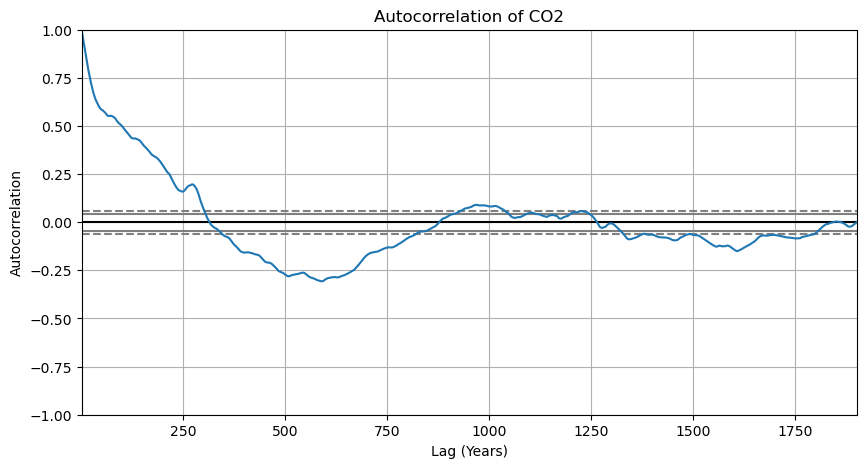

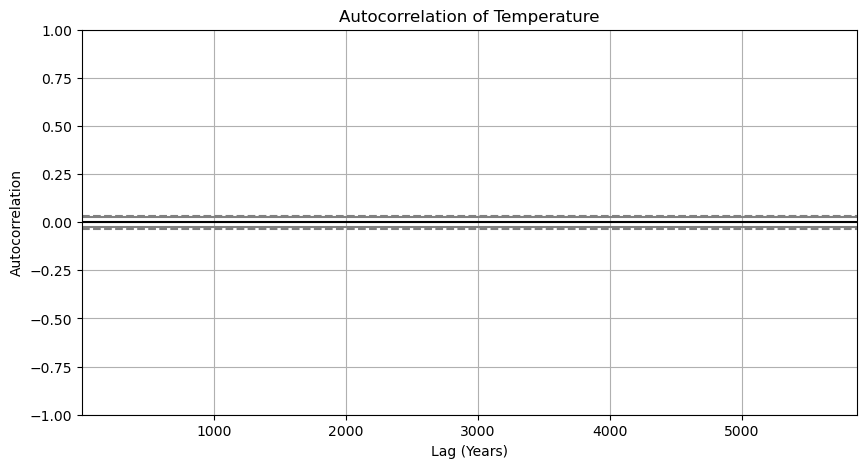

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

# Load CO2 data
file_path_co2 = 'co2.CSV'
df_co2 = pd.read_csv(file_path_co2)
co2_column_co2 = 'CO2 (ppmv)'


file_path_temp = 'TTEMP.csv'
df_temp = pd.read_csv(file_path_temp)
temperature_column_temp = 'DegreesC'

# Plot autocorrelation for CO2
plt.figure(figsize=(10, 5))
autocorrelation_plot(df_co2[co2_column_co2])
plt.title('Autocorrelation of CO2')
plt.xlabel('Lag (Years)')
plt.ylabel('Autocorrelation')
plt.show()

# Plot auto for Temp but not sure its working for temp
plt.figure(figsize=(10, 5))
autocorrelation_plot(df_temp[temperature_column_temp], color='orange')
plt.title('Autocorrelation of Temperature')
plt.xlabel('Lag (Years)')
plt.ylabel('Autocorrelation')
plt.show()


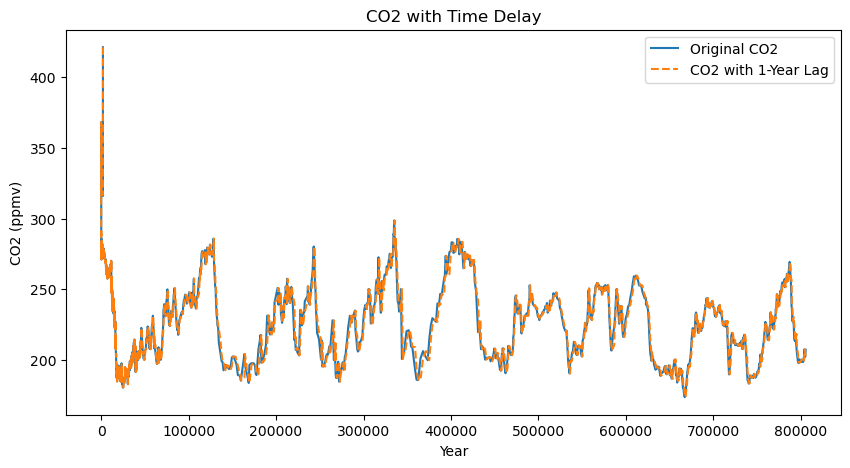

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

file_path_co2 = 'fusedco2.CSV'
df_co2 = pd.read_csv(file_path_co2)
co2_column_co2 = 'Mean'

df_co2['CO2_with_delay'] = df_co2[co2_column_co2].shift(1)

plt.figure(figsize=(10, 5))
plt.plot(df_co2['YearBP'], df_co2[co2_column_co2], label='Original CO2')
plt.plot(df_co2['YearBP'], df_co2['CO2_with_delay'], label='CO2 with 1-Year Lag', linestyle='--')
plt.title('CO2 with Time Delay')
plt.xlabel('Year')
plt.ylabel('CO2 (ppmv)')
plt.legend()
plt.show()



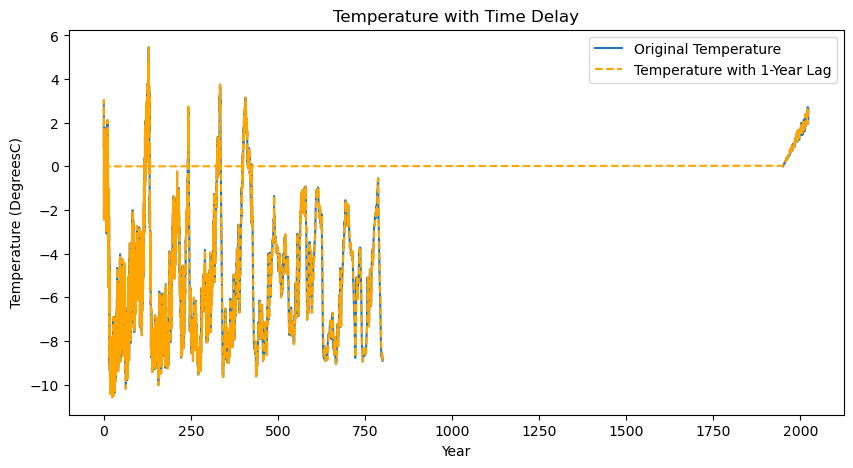

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

file_path_temp = 'TTEMP.csv'
df_temp = pd.read_csv(file_path_temp)
temperature_column_temp = 'DegreesC'

df_temp['Temperature_with_delay'] = df_temp[temperature_column_temp].shift(1)

plt.figure(figsize=(10, 5))
plt.plot(df_temp['Year'], df_temp[temperature_column_temp], label='Original Temperature')
plt.plot(df_temp['Year'], df_temp['Temperature_with_delay'], label='Temperature with 1-Year Lag', linestyle='--', color='orange')
plt.title('Temperature with Time Delay')
plt.xlabel('Year')
plt.ylabel('Temperature (DegreesC)')
plt.legend()
plt.show()


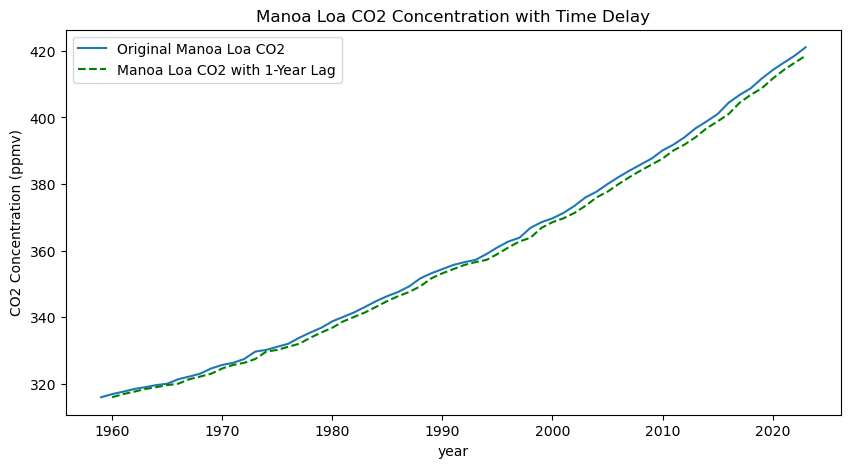

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

file_path_manoa_loa = 'manoaloa.csv'
df_manoa_loa = pd.read_csv(file_path_manoa_loa)
co2_column_manoa_loa = 'mean'

df_manoa_loa['CO2_with_delay'] = df_manoa_loa[co2_column_manoa_loa].shift(1)

plt.figure(figsize=(10, 5))
plt.plot(df_manoa_loa['year'], df_manoa_loa[co2_column_manoa_loa], label='Original Manoa Loa CO2')
plt.plot(df_manoa_loa['year'], df_manoa_loa['CO2_with_delay'], label='Manoa Loa CO2 with 1-Year Lag', linestyle='--', color='green')
plt.title('Manoa Loa CO2 Concentration with Time Delay')
plt.xlabel('year')
plt.ylabel('CO2 Concentration (ppmv)')
plt.legend()
plt.show()


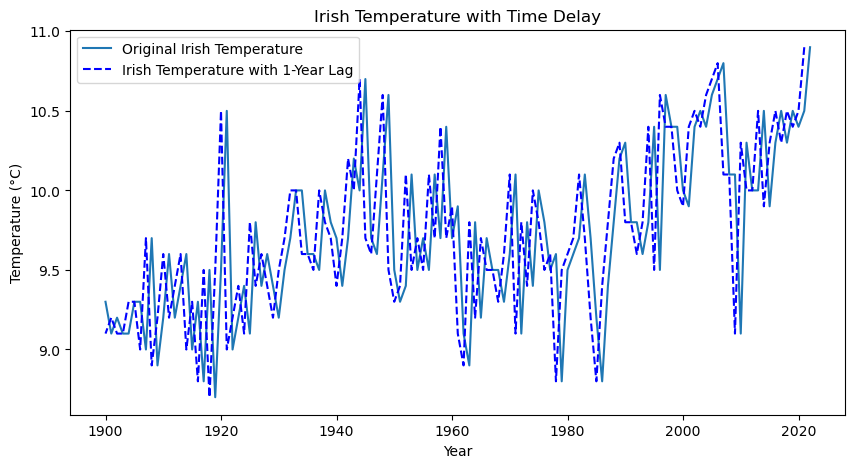

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

file_path_irish_temp = 'irishtemps.csv'
df_irish_temp = pd.read_csv(file_path_irish_temp)
temperature_column_irish_temp = 'Annual'

df_irish_temp['Temperature_with_delay'] = df_irish_temp[temperature_column_irish_temp].shift(1)

plt.figure(figsize=(10, 5))
plt.plot(df_irish_temp['year'], df_irish_temp[temperature_column_irish_temp], label='Original Irish Temperature')
plt.plot(df_irish_temp['year'], df_irish_temp['Temperature_with_delay'], label='Irish Temperature with 1-Year Lag', linestyle='--', color='blue')
plt.title('Irish Temperature with Time Delay')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


## Projections

**Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue.**

> For this, I opted for the following approach;

1 - For the temperature, I used the synthesised temp data (1950-2023) which was based off the the projection that warming in Antarctica is rising at a rate of between 0.22-0.32 Celcius per decade. From using this data as a starting point, I then used the Linear Regression to predict the future based off the past heating accelerations. Linear Regression, essentially, fits a straight line through the data points which it uses to make predictions of the future, in this case temperature from 2023-2073(arbitrary time period). The data showcases a mean warming of approximately 1.5 celcious in 50 years in Antarctica based off the projected .22-.32 per decade warming. The plot below showcases this. 

2 - For the co2, I used the full co2 dataset (fused with manoa loa) and also added a Linear Regression model to it. Again, the output is realistic in 2070, but less so that the temperature example. I suspect this is due to the limitations of linear Regression. When performing the regresion on temp - as stated above - it was using carefully crafted synthesised data to perform its regression - and the regression line aligned perfect to get a quite realistic future reading of mean temp increases (from a 0 celcius base in Antarctica starting 1950). However, The co2 data is considerably larger, and the tendency for the manoa loa data to spike so aggressively means the Linear Regression slighly under predicts the co2 in a 50 year projection. According to my Regression plot, co2 ppm will get to 500 or so by 2070 whereas according to https://www.theworldcounts.com/challenges/global-warming/CO2-concentration - 550 ppm is their projected modelling, but in 2050, not 2070 as mine does. To get it more accurate to the aforementioend projetions, I did an additional synthesised plot - with a linear scaling - starting from 2023 at 400ppm to 2073 at 650 pmm - pretty in line with current projections when scaled up from 2050 - 2070. 

> Sources needed

- [The worldcounts](https://www.theworldcounts.com/challenges/global-warming/CO2-concentration)

- [Latest projections](https://climate.copernicus.eu/latest-projections-future-climate-now-available)



/Users/gerball/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


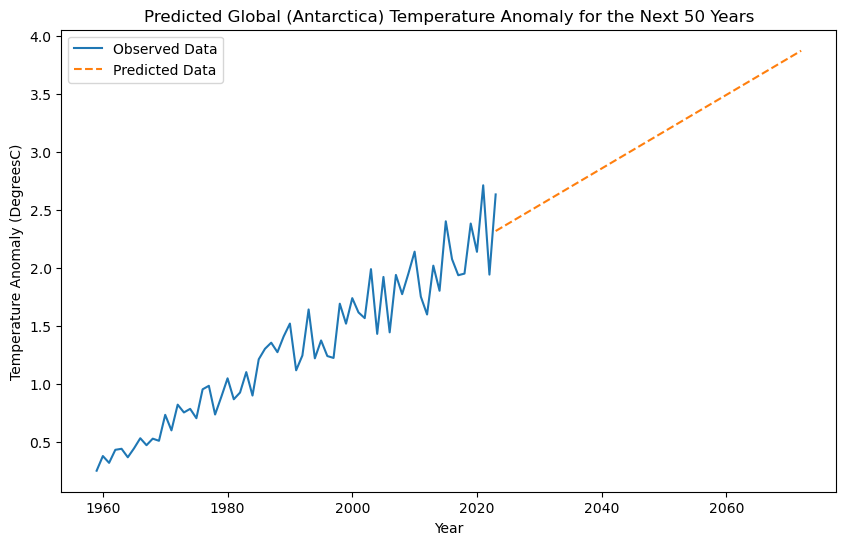

In [108]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

ttemp_df = pd.read_csv('TTEMP.csv')
year_column = 'Year'
temp_column = 'DegreesC'

observed_data = ttemp_df[(ttemp_df[year_column] >= 1959) & (ttemp_df[year_column] <= 2023)].copy()

model = LinearRegression()
model.fit(observed_data[[year_column]], observed_data[temp_column])

future_years = np.arange(2023, 2073).reshape(-1, 1)
predicted_temps = model.predict(future_years)

plt.figure(figsize=(10, 6))
plt.plot(observed_data[year_column], observed_data[temp_column], label='Observed Data')
plt.plot(future_years, predicted_temps, label='Predicted Data', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (DegreesC)')
plt.title('Predicted Global (Antarctica) Temperature Anomaly for the Next 50 Years')
plt.legend()
plt.show()


/Users/gerball/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


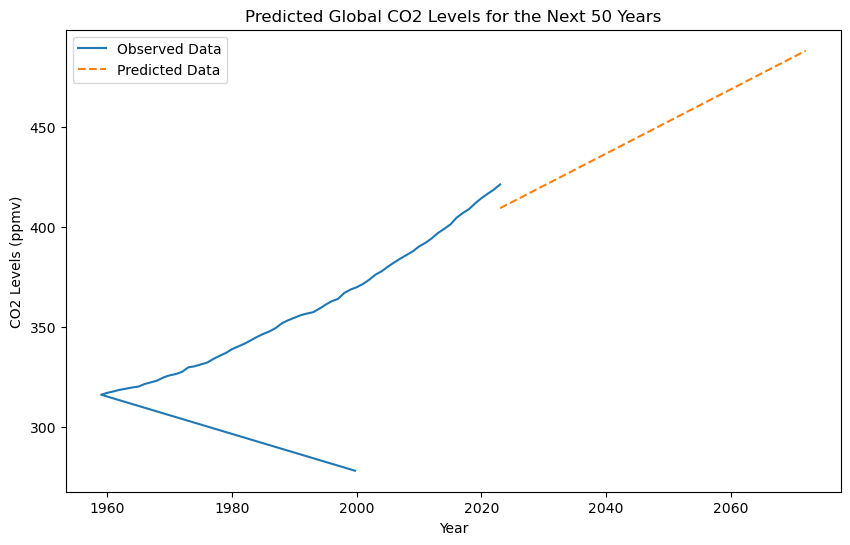

In [109]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

co2_df = pd.read_csv('fusedco2.csv')
year_column = 'YearBP'
co2_column = 'Mean'

observed_data = co2_df[(co2_df[year_column] >= 1959) & (co2_df[year_column] <= 2023)].copy()

model = LinearRegression()
model.fit(observed_data[[year_column]], observed_data[co2_column])

future_years = np.arange(2023, 2073).reshape(-1, 1)
predicted_co2 = model.predict(future_years)

plt.figure(figsize=(10, 6))
plt.plot(observed_data[year_column], observed_data[co2_column], label='Observed Data')
plt.plot(future_years, predicted_co2, label='Predicted Data', linestyle='dashed')
plt.xlabel('Year')
plt.ylabel('CO2 Levels (ppmv)')
plt.title('Predicted Global CO2 Levels for the Next 50 Years')
plt.legend()
plt.show()


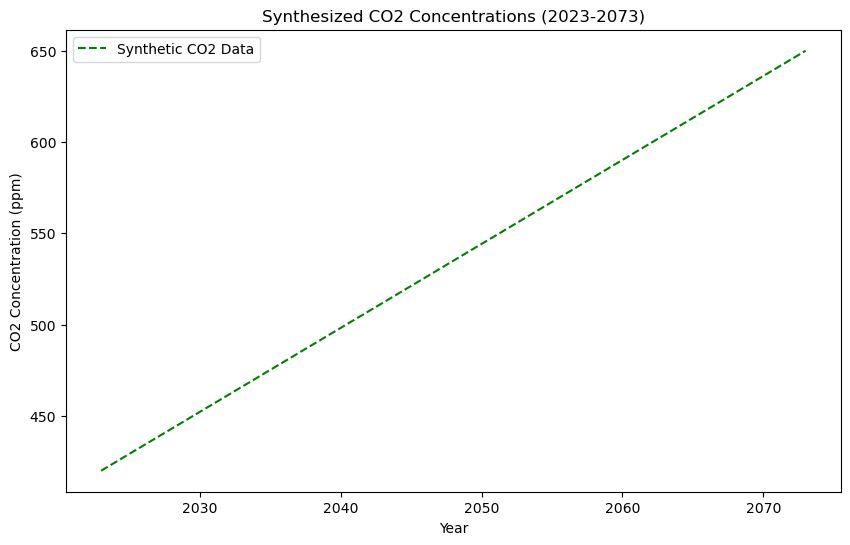

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

start_year = 2023
end_year = 2073
start_ppm = 420
end_ppm = 650

years_synthetic = np.arange(start_year, end_year + 1)
synthetic_co2_ppm = np.linspace(start_ppm, end_ppm, len(years_synthetic))

synthetic_co2_df = pd.DataFrame({'Year': years_synthetic, 'CO2_ppm': synthetic_co2_ppm})

plt.figure(figsize=(10, 6))
plt.plot(synthetic_co2_df['Year'], synthetic_co2_df['CO2_ppm'], label='Synthetic CO2 Data', linestyle='dashed', color='green')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Synthesized CO2 Concentrations (2023-2073)')
plt.legend()
plt.show()


END
***

## Commentary

**Comment on accelerated warming based on very latest features (e.g. temperature/polar-ice-coverage Commentary on  above phenpomenon;**

As stated in the prior section on temperature and co2 50 year projections - warming is happening on a scale that we - humans - have never seen before. The pure statistics bear this out;

- 2023 'earned' the unwanted record of becoming the hottest year since temperature records began - [Copernicus Climate Change Service](https://climate.copernicus.eu/copernicus-2023-hottest-year-record)

- Global warming temperatures were just below 1.5 celcius when compared to pre-industrial revolution levels - [Copernicus Climate Change Service](https://climate.copernicus.eu/copernicus-2023-hottest-year-record). This data is dangerously close to the pursued goal of limiting global warming to 'just' 1.5 degrees celcius and below 2 degrees celcius of the Paris Agreement - [United Nations](https://www.un.org/en/climatechange/paris-agreement).

- co2 ppm - as mentioned in this notebook countless times - has reached approximately 420ppm in 2023 as shown in the Manoa Loa dataset. This is projected to rise to 550ppm by 2050, which would represent an enormous 30 percent increse from 2020 totals, a mere 30 years. 

- Countless more unwanted trends like the Polar ice sheets losing approximately 8,000 billion tons if ice between 1992 and present - [IMBIE Report](https://www.meteorologicaltechnologyinternational.com/news/climate-measurement/imbie-report-confirms-rapid-and-recent-loss-of-polar-ice.html) and that the polar ice caps are melting at an estimated 6 times that of 1990's levels, just 30 years ago - [European Space Agency](https://www.esa.int/Applications/Observing_the_Earth/FutureEO/CryoSat/Ice_loss_from_Greenland_and_Antarctica_hits_new_record).

I could go on and labour the point but i think the point is clear; an unprecedented degree of climate change and warming is upon us humans. Earth has experienced far hotter cycles, far higher ppm levels in its atmosphere, for sure, over its history. That being said; that was natural and cyclical. What is happening now is a borderline major climate shift; one almost exclusively caused by human development post the industrial revolution. I remain unconvinced that the Paris Agreement will keep to its ideal 1.5 degree range, perhaps in a 100 years the new acceptable range will be 2-3 degress. Cynical, indeed, but looking at the projections, it is hard not to be.



## Conclusion

To conclude my findings; co2 is sharply on the rise, global temperatures are also as evidenced by warming between 0.13-0.33 per decade depending on the region and time scale. This notebook tried to evaluate overall temperature datasets, co2 datasets, irish specific datasets, ice depth datasets - it merged datasets together to gather data spanning 800,000 years until present and it offered up analysis of what the datasets were telling us; we are on a trajectory of a potential major climate shift, if we don't take large scale efforts to decrease, for one, our co2 emissions. It can also be seen that Ireland - despite its small size, lack of over population and general isolation - suffers much like the rest of the world. This is indicated by the study carried out by Maynooth University which classified Ireland's global warming at 88% that of the global average. Indeed, this is a collective problem, with collective responsibilities, which we, as a country - are dismally failing at - [Ireland to fall well short of climate targets](https://www.epa.ie/news-releases/news-releases-2023/ireland-projected-to-fall-well-short-of-climate-targets-says-epa.php).

When studying the data, its trends and plotting temporal analysis, it then becomes logical to try and project the data in the future, based off the trends set by the past. Just by using a simple Linear Regression Analysis, I got the temperature to accurately predict the Antarctica mean decade warming rate by using the above cited .22-.32 per decade warming - which is - unfortunately for Antarctica - higher than the global average. Accurate projections were also able to be made on co2 emissions using the co2 model, but less accurately so. To gain a more accurate approach of a projected co2 ppm of 550-600 in 2050 as referenced before, I simply synthesised a purpose - built linear dataset with a starting point of 2023 and a ppm of 420 and an end point of 2070 at 650ppm. This effectively shows our forecast if things go as they have been, increasing and increasing. 

In all my tempvco2 datasets, esepcially as evidenced in the below image, ![Alt text](image.png)you can clearly visualise the correlation between temperature and co2 data. This is further evidenced by the correlation coeficient score of over 0.84 between them. 
I found many aspects of this project difficult, in fact I had large problems with most of the sections relating to dataset location, merging drastically different time periods, a litany of 'small' coding errors specific to the fusing of datasets and finally, to having to perform Temporal analysis - which was alien to me for the most part and I relied exclusively from other sources to even get some oF it to work. 

Alas, it was a fun ride nonetheless. 



## Bibliography

1 - Agency, E.P. (no date) News releases 2023, News releases 2023 | Environmental Protection Agency. Available at: https://www.epa.ie/news-releases/news-releases-2023/ireland-projected-to-fall-well-short-of-climate-targets-says-epa.php (Accessed: 11 January 2024). 

2 - Copernicus: 2023 is the hottest year on record, with global temperatures close to the 1.5°C limit (no date) Home. Available at: https://climate.copernicus.eu/copernicus-2023-hottest-year-record (Accessed: 11 January 2024). 

3 - Education, U.C. for S. (no date) Center for Science Education, Warming in Antarctica | Center for Science Education. Available at: https://scied.ucar.edu/learning-zone/climate-change-impacts/warming-antarctica (Accessed: 11 January 2024). 

4 - (1969) Generating synthetic data using scikit-learn for ML, Stack Overflow. Available at: https://stackoverflow.com/questions/75431355/generating-synthetic-data-using-scikit-learn-for-ml (Accessed: 11 January 2024). 

5 - How are co₂ concentrations related to warming? (no date) Fakta o klimatu. Available at: https://factsonclimate.org/infographics/concentration-warming-relationship (Accessed: 11 January 2024). 


6 - How to add time delay in python? (2023) GeeksforGeeks. Available at: https://www.geeksforgeeks.org/how-to-add-time-delay-in-python/ (Accessed: 11 January 2024). 

7 - (1965) How to incorporate and forecast lagged time-series variables in a python regression model, Stack Overflow. Available at: https://stackoverflow.com/questions/58277927/how-to-incorporate-and-forecast-lagged-time-series-variables-in-a-python-regress (Accessed: 11 January 2024). 

8 - How to make synthetic datasets with Python: A complete guide for machine learning (no date) Better Data Science. Available at: https://betterdatascience.com/python-synthetic-datasets/ (Accessed: 11 January 2024). 

9 - https://stackoverflow.com/questions/12850345/how-do-i-combine-two-dataframes

10 - Ice loss from Greenland and Antarctica hits new record (no date) ESA. Available at: https://www.esa.int/Applications/Observing_the_Earth/FutureEO/CryoSat/Ice_loss_from_Greenland_and_Antarctica_hits_new_record (Accessed: 11 January 2024).

11 - Jake (2023) 4 ways of calculating autocorrelation function in Python, Scicoding. Available at: https://scicoding.com/4-ways-of-calculating-autocorrelation-in-python/ (Accessed: 11 January 2024). 

12 - Jouzel, J.M.-D. (1970) Epica Dome C Ice Core 800KYr deuterium data and temperature estimates, Jouzel, J; Masson-Delmotte, V (2007): EPICA Dome C Ice Core 800KYr deuterium data and temperature estimates. Available at: https://doi.pangaea.de/10.1594/PANGAEA.683655 (Accessed: 11 January 2024). 

13 - Latest projections of future climate now available (no date) Home. Available at: https://climate.copernicus.eu/latest-projections-future-climate-now-available (Accessed: 11 January 2024).  

14 -  Lüthi, D. et al. (no date) High-resolution carbon dioxide concentration record 650,000–800,000 years before present, Nature News. Available at: https://www.nature.com/articles/nature06949 (Accessed: 11 January 2024). 

16 - Murphy, C. et al. (1970) The emergence of a climate change signal in long-term Irish meteorological observations. Available at: https://mural.maynoothuniversity.ie/17515/ (Accessed: 11 January 2024).

16 - (No date) The world counts. Available at: https://www.theworldcounts.com/challenges/global-warming/CO2-concentration (Accessed: 11 January 2024). 

17 - (No date) Why Milankovitch (orbital) cycles can’t explain Earth’s current warming ... Available at: https://climate.nasa.gov/explore/ask-nasa-climate/2949/why-milankovitch-orbital-cycles-cant-explain-earths-current-warming/ (Accessed: 11 January 2024). 

18 - Real Python (2023) Combining data in pandas with merge(), .join(), and CONCAT(), Real Python. Available at: https://realpython.com/pandas-merge-join-and-concat/ (Accessed: 11 January 2024). 

19 - Rickson et al. (1963) Find time shift of two signals using cross correlation, Stack Overflow. Available at: https://stackoverflow.com/questions/41492882/find-time-shift-of-two-signals-using-cross-correlation (Accessed: 11 January 2024). 

20 - Symonds, D. (2023) Imbie Report confirms rapid and recent loss of Polar Ice, Meteorological Technology International. Available at: https://www.meteorologicaltechnologyinternational.com/news/climate-measurement/imbie-report-confirms-rapid-and-recent-loss-of-polar-ice.html (Accessed: 11 January 2024).

21 - Temperature (no date) Met Éireann - The Irish Meteorological Service. Available at: https://www.met.ie/climate/what-we-measure/temperature#top (Accessed: 11 January 2024). 

22 - The Paris Agreement (no date) United Nations. Available at: https://www.un.org/en/climatechange/paris-agreement (Accessed: 11 January 2024).  

23 - Zach (2020) How to calculate autocorrelation in python, Statology. Available at: https://www.statology.org/autocorrelation-python/ (Accessed: 11 January 2024). 


 